In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unrar x -Y "/content/drive/My Drive/CONCRETE_CRACK.rar"

Streaming output truncated to the last 5000 lines.
Extracting  CONCRETE_CRACK/Positive/15002_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15003_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15004_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15005_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15006_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15007_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15008_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15009_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15010_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Positive/15011_1.jpg                           84%  OK 
Extracting  CONCRETE_CRACK/Po

In [ ]:
import tensorflow as tf


In [ ]:
Negative="CONCRETE_CRACK/Negative/"
Positive="CONCRETE_CRACK/Positive/"

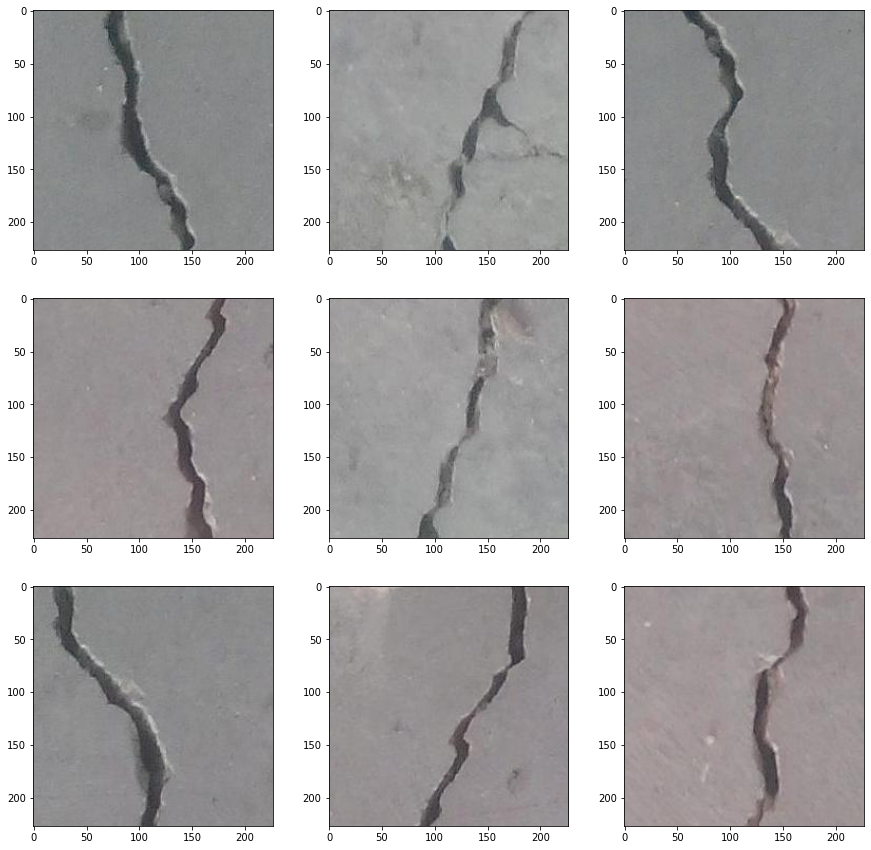

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename= Positive + "0000" + str(i+1) + ".jpg"
    image = plt.imread(filename)
    plt.imshow(image)
    
# show the figure
plt.show()

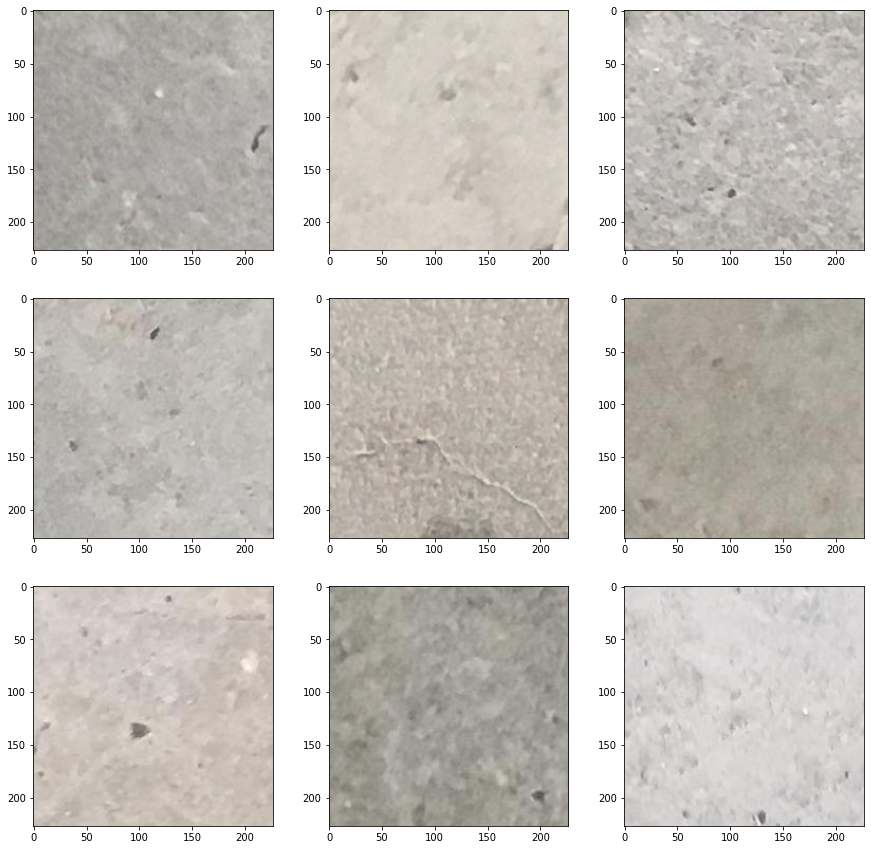

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename= Negative + "0000" + str(i+1) + ".jpg"
    image = plt.imread(filename)
    plt.imshow(image)
    
# show the figure
plt.show()

In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
classifier=Sequential()

#Step_1 Convolution
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step_2 Convolution
classifier.add(Conv2D(16,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step_3 Convolution
classifier.add(Conv2D(8,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Flatten
classifier.add(Flatten())

#Dense Layer
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(2,activation='softmax'))

classifier.compile(optimizer='sgd', loss='categorical_crossentropy',
                  metrics=['accuracy'])
classifier.summary()

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 8)          0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory("CONCRETE_CRACK/",
                                              target_size=(64,64),
                                              batch_size=16,
                                              class_mode='categorical')



Found 40000 images belonging to 2 classes.


In [ ]:
classifier.fit(training_set,epochs=1,batch_size=64)

2500/2500 [==============================] - 235s 94ms/step - loss: 0.2505 - accuracy: 0.8793


In [ ]:
classifier.save('My_Model_1.h5')